In [19]:
# Biblioteca para baixar arquivos do Google Drive
!pip install gdown

In [20]:
import os, gdown

csv_file = 'card_transdata.csv'

if not os.path.exists(csv_file):
    # Baixa o arquivo do Google Drive
    gdown.download(id='1mvP2vd-c1jpzQsRdgeOVOfbAm804DEMM', output=csv_file)
else:
    print(f'Arquivo {csv_file} já se encontra nesta sessão do colab')

Arquivo card_transdata.csv já se encontra nesta sessão do colab


In [37]:
import pandas as pd
#import plotly.express as px
import seaborn as sns

In [22]:
dataframe = pd.read_csv(csv_file)

In [23]:
dataframe.describe()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,26.628792,5.036519,1.824182,0.881536,0.350399,0.100608,0.650552,0.087403
std,65.390784,25.843093,2.799589,0.323157,0.477095,0.300809,0.476796,0.282425
min,0.004874,0.000118,0.004399,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.878008,0.296671,0.475673,1.000000,0.000000,0.000000,0.000000,0.000000
50%,9.967760,0.998650,0.997717,1.000000,0.000000,0.000000,1.000000,0.000000
75%,25.743985,3.355748,2.096370,1.000000,1.000000,0.000000,1.000000,0.000000
max,10632.723672,11851.104565,267.802942,1.000000,1.000000,1.000000,1.000000,1.000000


In [24]:
dataframe.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


In [25]:
dataframe.dtypes

,0
distance_from_home,float64
distance_from_last_transaction,float64
ratio_to_median_purchase_price,float64
repeat_retailer,float64
used_chip,float64
used_pin_number,float64
online_order,float64
fraud,float64


In [26]:
dataframe.isnull().sum()

,0
distance_from_home,0
distance_from_last_transaction,0
ratio_to_median_purchase_price,0
repeat_retailer,0
used_chip,0
used_pin_number,0
online_order,0
fraud,0


In [27]:
#DISCUSSÃO - faz sentido na compra online verificar o chip?
# Como a correlação é baixa, vamos simplesmente dropar a coluna com esses dados, mas usar as linhas das entradas
# calcular entradas que foram online e, ao mesmo tempo, utilizaram chip
dataframe[(dataframe['online_order'] == 1) & (dataframe['used_chip'] == 1)].shape[0]
#dropar a coluna relativa no datafram
#TODO

227903

In [28]:
#DISCUSSÃO2 - faz sentido na compra online utilizar o pin (senha)?
#Nesse caso, por conta da boa correlação (#4), vamos utilizar a coluna, considerando que, no caso de compras online, o pin é na realidade o CVV
#calcular entradas que foram online e, ao mesmo tempo, utilizaram pin (senha)
dataframe[(dataframe['online_order'] == 1) & (dataframe['used_pin_number'] == 1)].shape[0]

65409

In [29]:
number_of_fraud = len(dataframe[dataframe['fraud'] == 1])
number_of_not_fraud = len(dataframe[dataframe['fraud'] == 0])
print(f'Número de transações com fraude: {number_of_fraud}')
print(f'Número de transações sem fraude: {number_of_not_fraud}')
print(f'Porcentagem de transações com fraude: {number_of_fraud / len(dataframe) * 100}%')

Número de transações com fraude: 87403
Número de transações sem fraude: 912597
Porcentagem de transações com fraude: 8.7403%


In [36]:
# Método padrão de correlação: Pearson
dataframe_pearson_corr = dataframe.corr()
dataframe_pearson_corr

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
distance_from_home,1.000000,0.000193,-0.001374,0.143124,-0.000697,-0.001622,-0.001301,0.187571
distance_from_last_transaction,0.000193,1.000000,0.001013,-0.000928,0.002055,-0.000899,0.000141,0.091917
ratio_to_median_purchase_price,-0.001374,0.001013,1.000000,0.001374,0.000587,0.000942,-0.000330,0.462305
repeat_retailer,0.143124,-0.000928,0.001374,1.000000,-0.001345,-0.000417,-0.000532,-0.001357
used_chip,-0.000697,0.002055,0.000587,-0.001345,1.000000,-0.001393,-0.000219,-0.060975
used_pin_number,-0.001622,-0.000899,0.000942,-0.000417,-0.001393,1.000000,-0.000291,-0.100293
online_order,-0.001301,0.000141,-0.000330,-0.000532,-0.000219,-0.000291,1.000000,0.191973
fraud,0.187571,0.091917,0.462305,-0.001357,-0.060975,-0.100293,0.191973,1.000000


<Axes: >

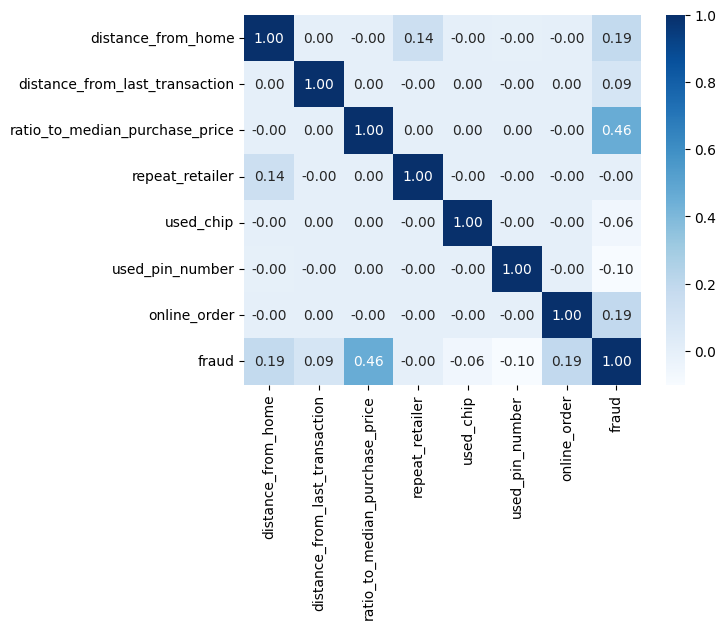

In [38]:
sns.heatmap(dataframe_pearson_corr, xticklabels = dataframe_pearson_corr.columns, yticklabels = dataframe_pearson_corr.columns, annot = True, fmt=".2f",cmap = "Blues")

In [39]:
dataframe_spearman_corr = dataframe.corr(method='spearman')
dataframe_spearman_corr

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
distance_from_home,1.000000,-0.001068,-0.000152,0.559724,-0.000118,-0.000338,-0.001812,0.095032
distance_from_last_transaction,-0.001068,1.000000,-0.000111,-0.001352,-0.000165,0.000555,-0.001076,0.034661
ratio_to_median_purchase_price,-0.000152,-0.000111,1.000000,0.001202,-0.000099,0.000251,-0.000376,0.342838
repeat_retailer,0.559724,-0.001352,0.001202,1.000000,-0.001345,-0.000417,-0.000532,-0.001357
used_chip,-0.000118,-0.000165,-0.000099,-0.001345,1.000000,-0.001393,-0.000219,-0.060975
used_pin_number,-0.000338,0.000555,0.000251,-0.000417,-0.001393,1.000000,-0.000291,-0.100293
online_order,-0.001812,-0.001076,-0.000376,-0.000532,-0.000219,-0.000291,1.000000,0.191973
fraud,0.095032,0.034661,0.342838,-0.001357,-0.060975,-0.100293,0.191973,1.000000


<Axes: >

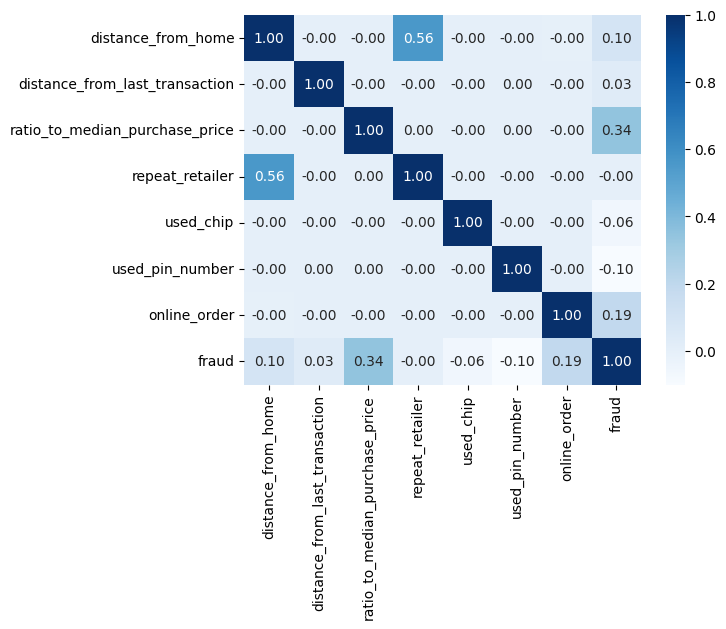

In [40]:
sns.heatmap(dataframe_spearman_corr, xticklabels = dataframe_spearman_corr.columns, yticklabels = dataframe_spearman_corr.columns, annot = True, fmt=".2f",cmap = "Blues")

In [32]:
# Gráfico pesado? Muitas comparações?
#grafico = px.scatter_matrix(dataframe, dimensions=['distance_from_home', 'distance_from_last_transaction', 'ratio_to_median_purchase_price', 'repeat_retailer', 'used_chip', 'used_pin_number', 'online_order', 'fraud'], color='fraud')
#grafico.show()

In [33]:
# ideia work in progress
dataframe_apenas_online = dataframe[dataframe['online_order'] == 1].drop('online_order', axis=1) # Avaliar necessidade de dropar também a coluna distance_from_home
dataframe_apenas_online.describe()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,fraud
count,650552.000000,650552.000000,650552.000000,650552.000000,650552.000000,650552.000000,650552.00000
mean,26.566435,5.039188,1.823505,0.881410,0.350322,0.100544,0.12714
std,65.040899,26.915736,2.796166,0.323306,0.477071,0.300724,0.33313
min,0.004874,0.000319,0.004399,0.000000,0.000000,0.000000,0.00000
25%,3.877650,0.296006,0.475435,1.000000,0.000000,0.000000,0.00000
50%,9.948229,0.995626,0.997604,1.000000,0.000000,0.000000,0.00000
75%,25.678092,3.353511,2.095678,1.000000,1.000000,0.000000,0.00000
max,10632.723672,11851.104565,266.689692,1.000000,1.000000,1.000000,1.00000


In [34]:
dataframe_sem_chip = dataframe.drop(['used_chip'], axis=1)
dataframe_sem_chip.describe()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_pin_number,online_order,fraud
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,26.628792,5.036519,1.824182,0.881536,0.100608,0.650552,0.087403
std,65.390784,25.843093,2.799589,0.323157,0.300809,0.476796,0.282425
min,0.004874,0.000118,0.004399,0.000000,0.000000,0.000000,0.000000
25%,3.878008,0.296671,0.475673,1.000000,0.000000,0.000000,0.000000
50%,9.967760,0.998650,0.997717,1.000000,0.000000,1.000000,0.000000
75%,25.743985,3.355748,2.096370,1.000000,0.000000,1.000000,0.000000
max,10632.723672,11851.104565,267.802942,1.000000,1.000000,1.000000,1.000000


In [49]:
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
import numpy as np

In [53]:
X = np.array(dataframe.drop(columns='fraud'))
Y = to_categorical(np.array(dataframe['fraud']))

In [62]:
Y

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [51]:
modelo = Sequential()
modelo.add(Dense(10, input_dim=7, activation='relu'))
modelo.add(Dense(2, activation='softmax'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [52]:
modelo.compile(loss='categorical_crossentropy', optimizer=SGD(), metrics=['accuracy'])

modelo.fit(X_train, y_train, epochs=100, batch_size=105)

Epoch 1/100
6667/6667 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step - accuracy: 0.9049 - loss: 0.3504
Epoch 2/100
6667/6667 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step - accuracy: 0.9260 - loss: 0.1944
Epoch 3/100
6667/6667 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - accuracy: 0.9424 - loss: 0.1469
Epoch 4/100
6667/6667 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step - accuracy: 0.9532 - loss: 0.1259
Epoch 5/100
6667/6667 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step - accuracy: 0.9580 - loss: 0.1107
Epoch 6/100
6667/6667 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step - accuracy: 0.9578 - loss: 0.1094
Epoch 7/100
6667/6667 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.9603 - loss: 0.0978
Epoch 8/100
6667/6667 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step - accuracy: 0.9595 - loss: 0.0973
Epoch 9/100
6667/6667 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step - accuracy: 0.9601 - loss: 0.0935
Epoch 10/100
6667/6667 ━━━━━━━━━━━━━━━━━━━━ 22s 2ms/step - accuracy: 0.9612 - loss: 0.0888
Epoch 11/100
6667/6667 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step - accuracy: 0.9479 - loss: 0.1228
Epoch 12

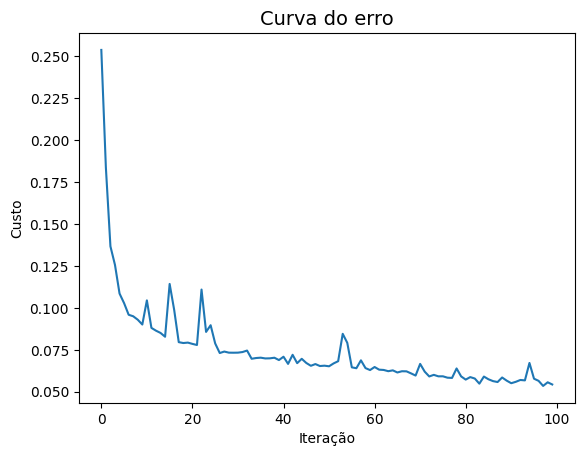

In [54]:
import matplotlib.pyplot as plt
plt.plot(modelo.history.history['loss'])
plt.title("Curva do erro", fontsize=14)
plt.xlabel('Iteração')
plt.ylabel('Custo')
plt.show()

In [55]:
predicoes = modelo.predict(X_test)

9375/9375 ━━━━━━━━━━━━━━━━━━━━ 12s 1ms/step


In [58]:
classes_previstas = np.argmax(predicoes, axis=1)
classes_reais = np.argmax(y_test, axis=1)

In [59]:
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(classes_reais, classes_previstas , normalize='pred')
print(cf_matrix)

[[0.98628289 0.10368054]
 [0.01371711 0.89631946]]


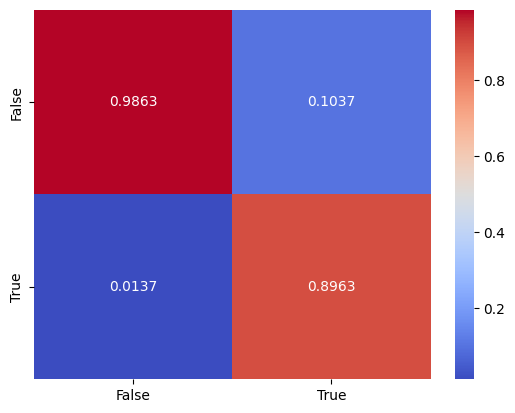

In [64]:
false_true = ['False', 'True']
sns.heatmap(cf_matrix, annot=True, fmt='.4f', cmap='coolwarm', xticklabels=false_true, yticklabels=false_true)
plt.show()